<p>Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.</p>

<p>This is a real world dataset obtained from a bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.</p>

<p>Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.</p>


In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.


['test.csv', 'train.csv', 'sample_submission.csv']


<h4><bold>Import challenge data </bold></h4>

<p>We import the data using pandas</p>


In [2]:
bike = pd.read_csv("./input/train.csv")
bike.head()

,Unnamed: 0,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
bike.describe()

,Unnamed: 0,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


<p>Now we will check our outcome (cnt) to see if it is a normally distributed variable </p>

In [4]:
import seaborn as sns
sns.distplot(bike['cnt'])

/home/gali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<p>As we can see, our outcome does not follow a normal distribution. It has two picks,</p>

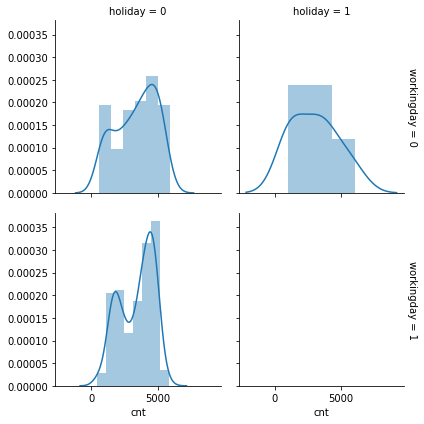

In [5]:
g = sns.FacetGrid(bike, row="workingday", col="holiday", margin_titles=True)
#g.map(ptl.hist,bike['cnt'])
g.map(sns.distplot,'cnt')

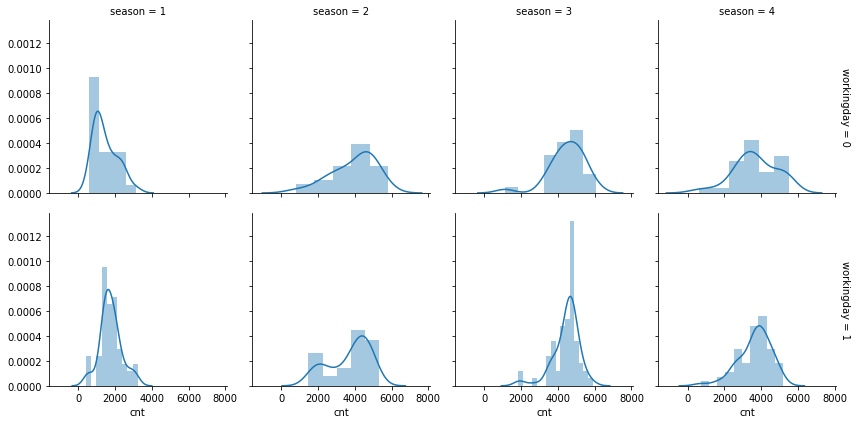

In [6]:
g = sns.FacetGrid(bike, row="workingday", col="season", margin_titles=True)
#g.map(ptl.hist,bike['cnt'])
g.map(sns.distplot,'cnt')

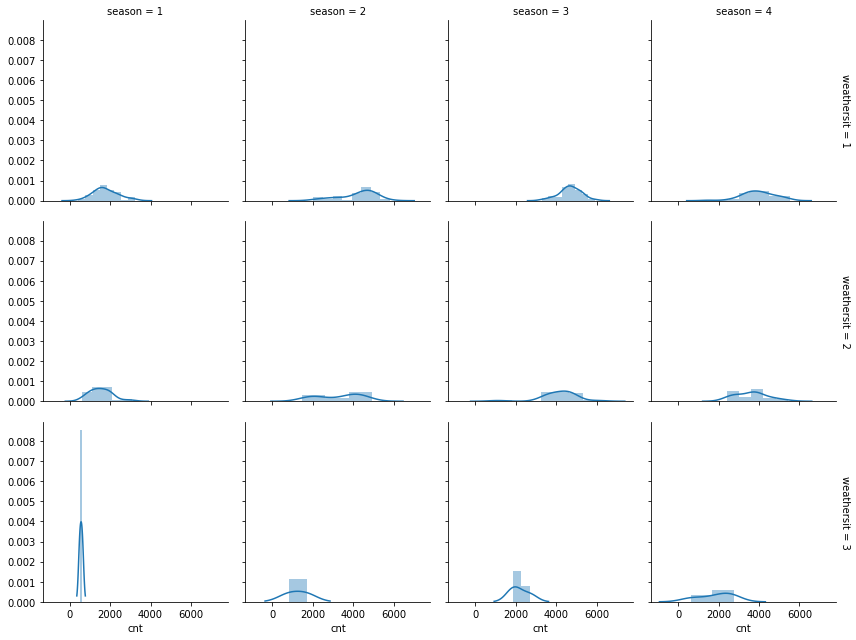

In [19]:
g = sns.FacetGrid(bike, row="weathersit", col="season", margin_titles=True)
#g.map(ptl.hist,bike['cnt'])
g.map(sns.distplot,'cnt')

<p>We will divide the train dataset into two sets, one for the independent variables (X) and one for the outcome (y).</p>
<p>X = x1,x2......xn</p>

In [7]:
X_train = bike.drop(columns="cnt")
y_train = bike['cnt']

#print(X_train) # Unnamed id season mnth holiday weekday workingday weathersit temp atemp hum windspeed
#print(y_train) # id cnt

<p>Now we will proceed to run a linear regression to show how models have to be ran in this challenge. </p>
<p style="{font:16px}"><strong>PYTHON RULE, R STILL SUCK</strong></p>

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the predictive model object
mod_logistic = LogisticRegression()

# Train the model using the training sets
mod_logistic.fit(X_train, y_train)

/home/gali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

/home/gali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


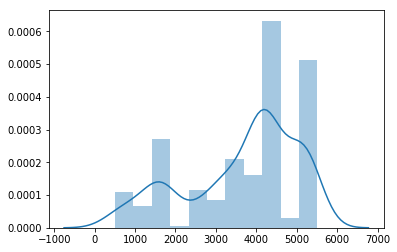

In [9]:
# Make predictions using the testing set
pred = mod_logistic.predict(X_train)

sns.distplot(pred)


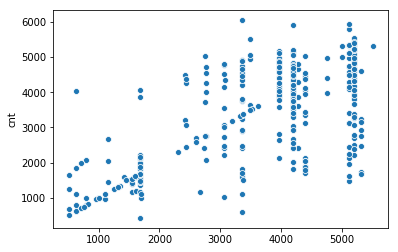

In [10]:
sns.scatterplot(pred, y_train)

In [11]:
test = pd.read_csv("./input/test.csv")
test.head()

,Unnamed: 0,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,2,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,3,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,4,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,5,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [12]:
test['cnt'] = mod_logistic.predict(test)
test.head()


,Unnamed: 0,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,366,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,627
1,367,2,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,627
2,368,3,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,5202
3,369,4,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,627
4,370,5,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,5202


In [13]:
res = test[(['id','cnt'])]
res.head()

,id,cnt
0,1,627
1,2,627
2,3,5202
3,4,627
4,5,5202


In [ ]:
### run this to generate the prediction file. Change each time the name by adding 
#info related to the model and the version,
### you must upload this files into the kaggle platform (on our competition page) 
#so this prediction can enter the challenge.

# res.to_csv("prediction_lm_v1.0.csv")